In [1]:
import os.path
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image

In [2]:
RQ4 = pd.read_csv(('../../data/analysis/RQ4.csv'))
RQ4 = RQ4.drop('Unnamed: 0', 1)
RQ4 = RQ4.iloc[1:]

In [3]:
RQ4 = RQ4.sort_values(['Average Form','Players'],ascending=False)
RQ4 = RQ4.reset_index()
RQ4.drop(RQ4.columns[0], axis=1, inplace=True)
RQ4.head(10)

,Players,club,league,age,nationality,Position,overall,potential,photo,Continent,Average Form
0,Lionel Messi,FC Barcelona,Spanish Primera Division,30.0,Argentina,Forward,93.0,93.0,https://cdn.sofifa.org/18/players/158023.png,South America,8.255952
1,Cristiano Ronaldo,Real Madrid CF,Spanish Primera Division,32.0,Portugal,Forward,94.0,94.0,https://cdn.sofifa.org/18/players/20801.png,Europe,7.926829
2,Luis Suarez,FC Barcelona,Spanish Primera Division,30.0,Uruguay,Forward,92.0,92.0,https://cdn.sofifa.org/18/players/176580.png,South America,7.018182
3,Zlatan Ibrahimovic,Manchester United,English Premier League,35.0,Sweden,Forward,88.0,88.0,https://cdn.sofifa.org/18/players/41236.png,Europe,6.900000
4,Robert Lewandowski,FC Bayern Munich,German Bundesliga,28.0,Poland,Forward,91.0,91.0,https://cdn.sofifa.org/18/players/188545.png,Europe,6.050000
5,Edinson Cavani,Paris Saint-Germain,French Ligue 1,30.0,Uruguay,Forward,87.0,87.0,https://cdn.sofifa.org/18/players/179813.png,South America,5.544910
6,Sergio Aguero,Manchester City,English Premier League,29.0,Argentina,Forward,89.0,89.0,https://cdn.sofifa.org/18/players/153079.png,South America,5.496599
7,Gareth Bale,Real Madrid CF,Spanish Primera Division,27.0,Wales,Midfielder,89.0,89.0,https://cdn.sofifa.org/18/players/173731.png,Europe,5.451128
8,Pierre Emerick Aubameyang,Borussia Dortmund,German Bundesliga,28.0,Gabon,Forward,88.0,88.0,https://cdn.sofifa.org/18/players/188567.png,Africa,5.393939
9,Gonzalo Higuain,Juventus,Italian Serie A,29.0,Argentina,Forward,90.0,90.0,https://cdn.sofifa.org/18/players/167664.png,South America,5.388235


In [4]:
RQ4_Best = RQ4[RQ4['age']<34] #best players
RQ4_Youth = RQ4[RQ4['age']<22] #best young players
RQ4_Oldies = RQ4[RQ4['age']>29] #best old players


In [5]:
def XI(position):
    SquadDB = RQ4_Best.copy()
    
    store = []
    for x in position:
        
        store.append([ x ,SquadDB.loc[[SquadDB[SquadDB['Position'] == x ]['Average Form'].idxmax()]]['Players'].to_string(index = False), SquadDB[SquadDB['Position'] == x ]['Average Form'].max(),SquadDB[SquadDB['Position'] == x ]['photo'].unique(),SquadDB[SquadDB['Position'] == x ]['overall'].max()])
        
        SquadDB.drop(SquadDB[SquadDB['Position'] == x ]['Average Form'].idxmax(), inplace = True)
     
    return pd.DataFrame(np.array(store).reshape(11,5), columns = ['Position', 'Players','Average Form','photo','overall']).to_string(index = False)

XI442 = ['Goalkeeper', 'Defender', 'Defender', 'Defender', 'Defender', 'Midfielder', 'Midfielder', 'Midfielder', 'Midfielder', 'Forward', 'Forward']

RQ4Best = (XI(XI442))

In [6]:
RQ4Best = RQ4Best.replace('h...','')
RQ4Best = RQ4Best.replace('...','')
RQ4Best = RQ4Best.replace('[','')
RQ4Best = RQ4Best.replace(',','')
lst = RQ4Best.split()
data = [lst[pos:pos+6] for pos in range(0, len(lst), 6)]
RQ4Best = pd.DataFrame(data[1:], columns=data[0])
RQ4Best['Players'] = RQ4Best['Players'] +' ' +  RQ4Best['Average']
RQ4Best = RQ4Best.drop('Average',1)

In [7]:
RQ4Best

,Position,Players,Form,photo,overall
0,Goalkeeper,Jan Oblak,4.21519,https://cdn.sofifa.org/18/players/200389.png,92
1,Defender,David Alaba,4.62121,https://cdn.sofifa.org/18/players/197445.png,90
2,Defender,Mattia Caldara,4.51613,https://cdn.sofifa.org/18/players/220477.png,90
3,Defender,Aleix Vidal,4.5,https://cdn.sofifa.org/18/players/202493.png,90
4,Defender,Alex Sandro,4.26531,https://cdn.sofifa.org/18/players/191043.png,90
5,Midfielder,Gareth Bale,5.45113,https://cdn.sofifa.org/18/players/173731.png,90
6,Midfielder,Max Kruse,5.01754,https://cdn.sofifa.org/18/players/183574.png,90
7,Midfielder,Arjen Robben,4.92523,https://cdn.sofifa.org/18/players/9014.png,90
8,Midfielder,Marco Reus,4.80645,https://cdn.sofifa.org/18/players/188350.png,90
9,Forward,Lionel Messi,8.25595,https://cdn.sofifa.org/18/players/158023.png,94


In [8]:
def XI(position):
    SquadDB = RQ4_Youth.copy()
    
    store = []
    for x in position:
        
        store.append([ x ,SquadDB.loc[[SquadDB[SquadDB['Position'] == x ]['Average Form'].idxmax()]]['Players'].to_string(index = False), SquadDB[SquadDB['Position'] == x ]['Average Form'].max(),SquadDB[SquadDB['Position'] == x ]['photo'].unique(),SquadDB[SquadDB['Position'] == x ]['overall'].max()])
        
        SquadDB.drop(SquadDB[SquadDB['Position'] == x ]['Average Form'].idxmax(), inplace = True)
     
    return pd.DataFrame(np.array(store).reshape(11,5), columns = ['Position', 'Players','Average Form','photo','overall']).to_string(index = False)

XI442 = ['Goalkeeper', 'Defender', 'Defender', 'Defender', 'Defender', 'Midfielder', 'Midfielder', 'Midfielder', 'Midfielder', 'Forward', 'Forward']

RQ4Youth = (XI(XI442))

In [9]:
RQ4Youth = RQ4Youth.replace('h...','')
RQ4Youth = RQ4Youth.replace('...','')
RQ4Youth = RQ4Youth.replace('[','')
RQ4Youth = RQ4Youth.replace(',','')
lst = RQ4Youth.split()
data = [lst[pos:pos+6] for pos in range(0, len(lst), 6)]
RQ4Youth = pd.DataFrame(data[1:], columns=data[0])
RQ4Youth['Players'] = RQ4Youth['Players'] +' ' +  RQ4Youth['Average']
RQ4Youth = RQ4Youth.drop('Average',1)

In [10]:
RQ4Youth

,Position,Players,Form,photo,overall
0,Goalkeeper,Gianluigi Donnarumma,2.97059,https://cdn.sofifa.org/18/players/230621.png,82
1,Defender,Presnel Kimpembe,4.11538,https://cdn.sofifa.org/18/players/225850.png,83
2,Defender,Almamy Toure,4.03333,https://cdn.sofifa.org/18/players/227873.png,83
3,Defender,Lucas Hernandez,3.57692,https://cdn.sofifa.org/18/players/220814.png,83
4,Defender,Matt Targett,3.04,https://cdn.sofifa.org/18/players/218659.png,83
5,Midfielder,Dele Alli,4.42857,https://cdn.sofifa.org/18/players/211117.png,84
6,Midfielder,Ousmane Dembele,3.96552,https://cdn.sofifa.org/18/players/231443.png,84
7,Midfielder,Anthony Martial,3.59322,https://cdn.sofifa.org/18/players/211300.png,84
8,Midfielder,Gabriel Boschilia,3.5625,https://cdn.sofifa.org/18/players/221701.png,84
9,Forward,Timo Werner,3.3254,https://cdn.sofifa.org/18/players/212188.png,82


In [11]:
def XI(position):
    SquadDB = RQ4_Oldies.copy()
    
    store = []
    for x in position:
        
        store.append([ x ,SquadDB.loc[[SquadDB[SquadDB['Position'] == x ]['Average Form'].idxmax()]]['Players'].to_string(index = False), SquadDB[SquadDB['Position'] == x ]['Average Form'].max(),SquadDB[SquadDB['Position'] == x ]['photo'].unique(),SquadDB[SquadDB['Position'] == x ]['overall'].max()])
        
        SquadDB.drop(SquadDB[SquadDB['Position'] == x ]['Average Form'].idxmax(), inplace = True)
     
    return pd.DataFrame(np.array(store).reshape(11,5), columns = ['Position', 'Players','Average Form','photo','overall']).to_string(index = False)

XI442 = ['Goalkeeper', 'Defender', 'Defender', 'Defender', 'Defender', 'Midfielder', 'Midfielder', 'Midfielder', 'Midfielder', 'Forward', 'Forward']

RQ4Oldies = (XI(XI442))

In [12]:
RQ4Oldies = RQ4Oldies.replace('h...','')
RQ4Oldies = RQ4Oldies.replace('...','')
RQ4Oldies = RQ4Oldies.replace('[','')
RQ4Oldies = RQ4Oldies.replace(',','')
lst = RQ4Oldies.split()
data = [lst[pos:pos+6] for pos in range(0, len(lst), 6)]
RQ4Oldies = pd.DataFrame(data[1:], columns=data[0])
RQ4Oldies['Players'] = RQ4Oldies['Players'] +' ' +  RQ4Oldies['Average']
RQ4Oldies = RQ4Oldies.drop('Average',1)

In [13]:
RQ4Oldies

,Position,Players,Form,photo,overall
0,Goalkeeper,Tom Starke,4.5,https://cdn.sofifa.org/18/players/107713.png,92
1,Defender,Diego Godin,4.13939,https://cdn.sofifa.org/18/players/182493.png,90
2,Defender,Giorgio Chiellini,4.125,https://cdn.sofifa.org/18/players/138956.png,90
3,Defender,Ashley Cole,4,https://cdn.sofifa.org/18/players/34079.png,90
4,Defender,Filipe Luis,3.95862,https://cdn.sofifa.org/18/players/164169.png,90
5,Midfielder,Arjen Robben,4.92523,https://cdn.sofifa.org/18/players/9014.png,89
6,Midfielder,Franck Ribery,4.63636,https://cdn.sofifa.org/18/players/156616.png,89
7,Midfielder,Alexander Meier,4.56303,https://cdn.sofifa.org/18/players/121170.png,89
8,Midfielder,Dimitri Payet,4.00578,https://cdn.sofifa.org/18/players/177388.png,89
9,Forward,Lionel Messi,8.25595,https://cdn.sofifa.org/18/players/158023.png,94


In [14]:
RQ4Oldies = RQ4Oldies.reset_index()
RQ4Oldies = RQ4Oldies.drop('index',1)
RQ4Oldies['Form'] = RQ4Oldies['Form'].astype(float)
RQ4Oldies['Form'] = RQ4Oldies['Form'].round(2)
RQ4Oldies[['Form','overall']] = RQ4Oldies[['Form','overall']].astype(str)
RQ4Oldies['photo'] = RQ4Oldies['photo'].replace('/18/','/1x/18/', regex=True)
RQ4Oldies[['Sum1']] = RQ4Oldies[['overall']].astype(float)
Oldies_Squad_Rating = (RQ4Oldies[['Sum1']].sum())/11
RQ4Oldies = RQ4Oldies.drop('Sum1',1)
Oldies_Squad_Rating = Oldies_Squad_Rating.round(2)
Oldies_Squad_Rating = Oldies_Squad_Rating.astype(str)

RQ4Best = RQ4Best.reset_index()
RQ4Best = RQ4Best.drop('index',1)
RQ4Best['Form'] = RQ4Best['Form'].astype(float)
RQ4Best['Form'] = RQ4Best['Form'].round(2)
RQ4Best[['Form','overall']] = RQ4Best[['Form','overall']].astype(str)
RQ4Best['photo'] = RQ4Best['photo'].replace('/18/','/1x/18/', regex=True)
RQ4Best[['Sum1']] = RQ4Best[['overall']].astype(float)
Best_Squad_Rating = (RQ4Best[['Sum1']].sum())/11
RQ4Best = RQ4Best.drop('Sum1',1)
Best_Squad_Rating = Best_Squad_Rating.round(2)
Best_Squad_Rating = Best_Squad_Rating.astype(str)

RQ4Youth = RQ4Youth.reset_index()
RQ4Youth = RQ4Youth.drop('index',1)
RQ4Youth['Form'] = RQ4Youth['Form'].astype(float)
RQ4Youth['Form'] = RQ4Youth['Form'].round(2)
RQ4Youth[['Form','overall']] = RQ4Youth[['Form','overall']].astype(str)
RQ4Youth['photo'] = RQ4Youth['photo'].replace('/18/','/1x/18/', regex=True)
RQ4Youth[['Sum1']] = RQ4Youth[['overall']].astype(float)
Youth_Squad_Rating = (RQ4Youth[['Sum1']].sum())/11
RQ4Youth = RQ4Youth.drop('Sum1',1)
Youth_Squad_Rating = Youth_Squad_Rating.round(2)
Youth_Squad_Rating = Youth_Squad_Rating.astype(str)



In [15]:
JoinedBestImages = RQ4Best['photo'].as_matrix()

GK1 = mpimg.imread(JoinedBestImages[0])
DF1 = mpimg.imread(JoinedBestImages[1])
DF2 = mpimg.imread(JoinedBestImages[2])
DF3 = mpimg.imread(JoinedBestImages[3])
DF4 = mpimg.imread(JoinedBestImages[4])
MD1 = mpimg.imread(JoinedBestImages[5])
MD2 = mpimg.imread(JoinedBestImages[6])
MD3 = mpimg.imread(JoinedBestImages[7])
MD4 = mpimg.imread(JoinedBestImages[8])
FW1 = mpimg.imread(JoinedBestImages[9])
FW2 = mpimg.imread(JoinedBestImages[10])

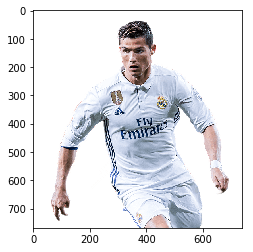

In [16]:
img = mpimg.imread("../../data/raw/ronny.png")
plt.imshow(img,zorder=0)

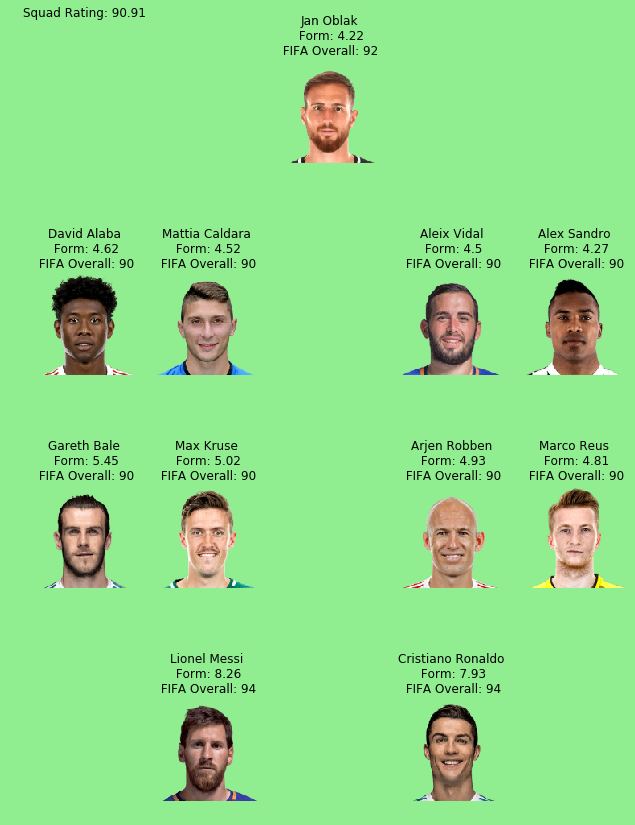

In [17]:
f, axarr = plt.subplots(4,7,figsize=(15,15),facecolor='lightgreen')
fig = plt.figure()
axarr[0,0].set_visible(False)
axarr[0,1].set_visible(False)
axarr[0,3].set_visible(False)
axarr[0,5].set_visible(False)
axarr[0,6].set_visible(False)
axarr[1,0].set_visible(False)
axarr[1,1].set_visible(False)
axarr[1,4].set_visible(False)
axarr[2,0].set_visible(False)
axarr[2,1].set_visible(False)
axarr[2,4].set_visible(False)
axarr[3,0].set_visible(False)
axarr[3,1].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,6].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,2].set_visible(False)
axarr[3,6].set_visible(False)


axarr[0,2].set_title('Squad Rating: ' + Best_Squad_Rating[0])
axarr[0,2].axis('off')

axarr[0,4].imshow(GK1)
axarr[0,4].set_title(RQ4Best['Players'].loc[0] + '\n' + ' Form: ' + RQ4Best['Form'].loc[0] + '\n' + ' FIFA Overall: ' + RQ4Best['overall'].loc[0])
axarr[0,4].axis('off')


axarr[1,2].imshow(DF1)
axarr[1,2].set_title(RQ4Best['Players'].loc[1] + '\n' + ' Form: ' + RQ4Best['Form'].loc[1] + '\n' + ' FIFA Overall: ' + RQ4Best['overall'].loc[1])
axarr[1,2].axis('off')


axarr[1,3].imshow(DF2)
axarr[1,3].set_title(RQ4Best['Players'].loc[2] + '\n' + ' Form: ' + RQ4Best['Form'].loc[2] + '\n' + ' FIFA Overall: ' + RQ4Best['overall'].loc[2])
axarr[1,3].axis('off')


axarr[1,5].imshow(DF3)
axarr[1,5].set_title(RQ4Best['Players'].loc[3] + '\n' + ' Form: ' + RQ4Best['Form'].loc[3] + '\n' + ' FIFA Overall: ' + RQ4Best['overall'].loc[3])
axarr[1,5].axis('off')


axarr[1,6].imshow(DF4)
axarr[1,6].set_title(RQ4Best['Players'].loc[4] + '\n' + ' Form: ' + RQ4Best['Form'].loc[4] + '\n' + ' FIFA Overall: ' + RQ4Best['overall'].loc[4])
axarr[1,6].axis('off')


axarr[2,2].imshow(MD1)
axarr[2,2].set_title(RQ4Best['Players'].loc[5] + '\n' + ' Form: ' + RQ4Best['Form'].loc[5] + '\n' + ' FIFA Overall: ' + RQ4Best['overall'].loc[5])
axarr[2,2].axis('off')


axarr[2,3].imshow(MD2)
axarr[2,3].set_title(RQ4Best['Players'].loc[6] + '\n' + ' Form: ' + RQ4Best['Form'].loc[6] + '\n' + ' FIFA Overall: ' + RQ4Best['overall'].loc[6])
axarr[2,3].axis('off')


axarr[2,5].imshow(MD3)
axarr[2,5].set_title(RQ4Best['Players'].loc[7] + '\n' + ' Form: ' + RQ4Best['Form'].loc[7] + '\n' + ' FIFA Overall: ' + RQ4Best['overall'].loc[7])
axarr[2,5].axis('off')


axarr[2,6].imshow(MD4)
axarr[2,6].set_title(RQ4Best['Players'].loc[8] + '\n' + ' Form: ' + RQ4Best['Form'].loc[8] + '\n' + ' FIFA Overall: ' + RQ4Best['overall'].loc[8])
axarr[2,6].axis('off')


axarr[3,3].imshow(FW1)
axarr[3,3].set_title(RQ4Best['Players'].loc[9] + '\n' + ' Form: ' + RQ4Best['Form'].loc[9] + '\n' + ' FIFA Overall: ' + RQ4Best['overall'].loc[9])
axarr[3,3].axis('off')

axarr[3,5].imshow(FW2)
axarr[3,5].set_title(RQ4Best['Players'].loc[10] + '\n' + ' Form: ' + RQ4Best['Form'].loc[10] + '\n' + ' FIFA Overall: ' + RQ4Best['overall'].loc[10])
axarr[3,5].axis('off')

fig.savefig('../../data/analysis/Best.png')

In [18]:
RQ4Youth

,Position,Players,Form,photo,overall
0,Goalkeeper,Gianluigi Donnarumma,2.97,https://cdn.sofifa.org/1x/18/players/230621.png,82
1,Defender,Presnel Kimpembe,4.12,https://cdn.sofifa.org/1x/18/players/225850.png,83
2,Defender,Almamy Toure,4.03,https://cdn.sofifa.org/1x/18/players/227873.png,83
3,Defender,Lucas Hernandez,3.58,https://cdn.sofifa.org/1x/18/players/220814.png,83
4,Defender,Matt Targett,3.04,https://cdn.sofifa.org/1x/18/players/218659.png,83
5,Midfielder,Dele Alli,4.43,https://cdn.sofifa.org/1x/18/players/211117.png,84
6,Midfielder,Ousmane Dembele,3.97,https://cdn.sofifa.org/1x/18/players/231443.png,84
7,Midfielder,Anthony Martial,3.59,https://cdn.sofifa.org/1x/18/players/211300.png,84
8,Midfielder,Gabriel Boschilia,3.56,https://cdn.sofifa.org/1x/18/players/221701.png,84
9,Forward,Timo Werner,3.33,https://cdn.sofifa.org/1x/18/players/212188.png,82


In [19]:
JoinedYouthImages = RQ4Youth['photo'].as_matrix()

GK1 = mpimg.imread(JoinedYouthImages[0])
DF1 = mpimg.imread(JoinedYouthImages[1])
DF2 = mpimg.imread(JoinedYouthImages[2])
DF3 = mpimg.imread(JoinedYouthImages[3])
DF4 = mpimg.imread(JoinedYouthImages[4])
MD1 = mpimg.imread(JoinedYouthImages[5])
MD2 = mpimg.imread(JoinedYouthImages[6])
MD3 = mpimg.imread(JoinedYouthImages[7])
MD4 = mpimg.imread(JoinedYouthImages[8])
FW1 = mpimg.imread(JoinedYouthImages[9])
FW2 = mpimg.imread(JoinedYouthImages[10])

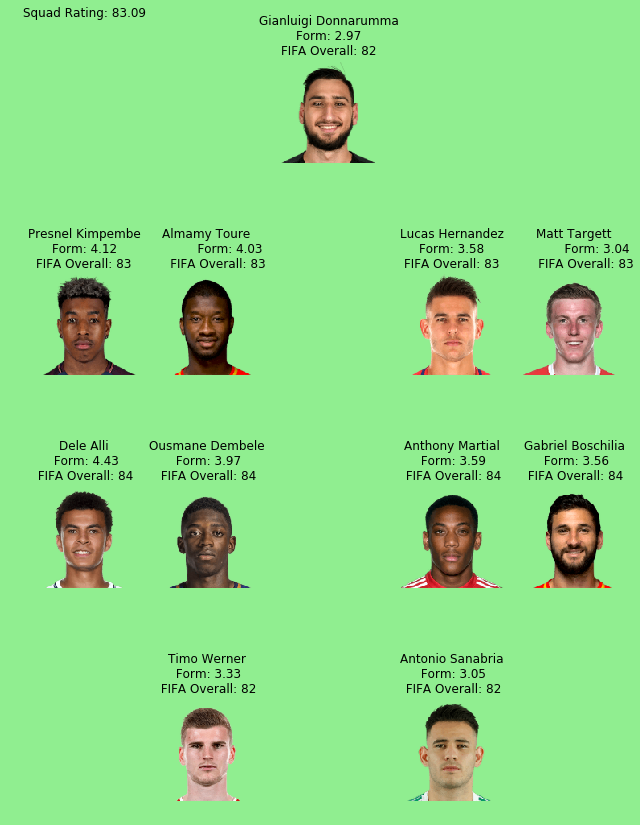

In [ ]:
f, axarr = plt.subplots(4,7,figsize=(15,15),facecolor='lightgreen')
fig = plt.figure()
axarr[0,0].set_visible(False)
axarr[0,1].set_visible(False)
axarr[0,3].set_visible(False)
axarr[0,5].set_visible(False)
axarr[0,6].set_visible(False)
axarr[1,0].set_visible(False)
axarr[1,1].set_visible(False)
axarr[1,4].set_visible(False)
axarr[2,0].set_visible(False)
axarr[2,1].set_visible(False)
axarr[2,4].set_visible(False)
axarr[3,0].set_visible(False)
axarr[3,1].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,6].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,2].set_visible(False)
axarr[3,6].set_visible(False)

axarr[0,2].set_title('Squad Rating: ' + Youth_Squad_Rating[0])
axarr[0,2].axis('off')

axarr[0,4].imshow(GK1)
axarr[0,4].set_title(RQ4Youth['Players'].loc[0] + '\n' + 'Form: ' + RQ4Youth['Form'].loc[0] + '\n' + 'FIFA Overall: ' + RQ4Youth['overall'].loc[0])
axarr[0,4].axis('off')


axarr[1,2].imshow(DF1)
axarr[1,2].set_title(RQ4Youth['Players'].loc[1] + '\n' + 'Form: ' + RQ4Youth['Form'].loc[1] + '\n' + 'FIFA Overall: ' + RQ4Youth['overall'].loc[1])
axarr[1,2].axis('off')


axarr[1,3].imshow(DF2)
axarr[1,3].set_title(RQ4Youth['Players'].loc[2] + '\n' + '            Form: ' + RQ4Youth['Form'].loc[2] + '\n' + '      FIFA Overall: ' + RQ4Youth['overall'].loc[2])
axarr[1,3].axis('off')


axarr[1,5].imshow(DF3)
axarr[1,5].set_title(RQ4Youth['Players'].loc[3] + '\n' + 'Form: ' + RQ4Youth['Form'].loc[3] + '\n' + 'FIFA Overall: ' + RQ4Youth['overall'].loc[3])
axarr[1,5].axis('off')


axarr[1,6].imshow(DF4)
axarr[1,6].set_title(RQ4Youth['Players'].loc[4] + '\n' + '            Form: ' + RQ4Youth['Form'].loc[4] + '\n' + '      FIFA Overall: ' + RQ4Youth['overall'].loc[4])
axarr[1,6].axis('off')


axarr[2,2].imshow(MD1)
axarr[2,2].set_title(RQ4Youth['Players'].loc[5] + '\n' + ' Form: ' + RQ4Youth['Form'].loc[5] + '\n' + ' FIFA Overall: ' + RQ4Youth['overall'].loc[5])
axarr[2,2].axis('off')


axarr[2,3].imshow(MD2)
axarr[2,3].set_title(RQ4Youth['Players'].loc[6] + '\n' + ' Form: ' + RQ4Youth['Form'].loc[6] + '\n' + ' FIFA Overall: ' + RQ4Youth['overall'].loc[6])
axarr[2,3].axis('off')


axarr[2,5].imshow(MD3)
axarr[2,5].set_title(RQ4Youth['Players'].loc[7] + '\n' + ' Form: ' + RQ4Youth['Form'].loc[7] + '\n' + ' FIFA Overall: ' + RQ4Youth['overall'].loc[7])
axarr[2,5].axis('off')


axarr[2,6].imshow(MD4)
axarr[2,6].set_title(RQ4Youth['Players'].loc[8] + '\n' + ' Form: ' + RQ4Youth['Form'].loc[8] + '\n' + ' FIFA Overall: ' + RQ4Youth['overall'].loc[8])
axarr[2,6].axis('off')


axarr[3,3].imshow(FW1)
axarr[3,3].set_title(RQ4Youth['Players'].loc[9] + '\n' + ' Form: ' + RQ4Youth['Form'].loc[9] + '\n' + ' FIFA Overall: ' + RQ4Youth['overall'].loc[9])
axarr[3,3].axis('off')

axarr[3,5].imshow(FW2)
axarr[3,5].set_title(RQ4Youth['Players'].loc[10] + '\n' + ' Form: ' + RQ4Youth['Form'].loc[10] + '\n' + ' FIFA Overall: ' + RQ4Youth['overall'].loc[10])
axarr[3,5].axis('off')

fig.savefig('../../data/analysis/Youth.png')

In [ ]:
JoinedOldiesImages = RQ4Oldies['photo'].as_matrix()

GK1 = mpimg.imread(JoinedOldiesImages[0])
DF1 = mpimg.imread(JoinedOldiesImages[1])
DF2 = mpimg.imread(JoinedOldiesImages[2])
DF3 = mpimg.imread(JoinedOldiesImages[3])
DF4 = mpimg.imread(JoinedOldiesImages[4])
MD1 = mpimg.imread(JoinedOldiesImages[5])
MD2 = mpimg.imread(JoinedOldiesImages[6])
MD3 = mpimg.imread(JoinedOldiesImages[7])
MD4 = mpimg.imread(JoinedOldiesImages[8])
FW1 = mpimg.imread(JoinedOldiesImages[9])
FW2 = mpimg.imread(JoinedOldiesImages[10])

In [ ]:
RQ4Oldies['overall'].sum()

In [ ]:
f, axarr = plt.subplots(4,7,figsize=(15,15),facecolor='lightgreen')
fig = plt.figure()
axarr[0,0].set_visible(False)
axarr[0,1].set_visible(False)
axarr[0,3].set_visible(False)
axarr[0,5].set_visible(False)
axarr[0,6].set_visible(False)
axarr[1,0].set_visible(False)
axarr[1,1].set_visible(False)
axarr[1,4].set_visible(False)
axarr[2,0].set_visible(False)
axarr[2,1].set_visible(False)
axarr[2,4].set_visible(False)
axarr[3,0].set_visible(False)
axarr[3,1].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,6].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,2].set_visible(False)
axarr[3,6].set_visible(False)


axarr[0,2].set_title('Squad Rating: ' + Oldies_Squad_Rating[0])
axarr[0,2].axis('off')

axarr[0,4].imshow(GK1)
axarr[0,4].set_title(RQ4Oldies['Players'].loc[0] + '\n' + 'Form: ' + RQ4Oldies['Form'].loc[0] + '\n' + 'FIFA Overall: ' + RQ4Oldies['overall'].loc[0])
axarr[0,4].axis('off')


axarr[1,2].imshow(DF1)
axarr[1,2].set_title(RQ4Oldies['Players'].loc[1] + '\n' + 'Form: ' + RQ4Oldies['Form'].loc[1] + '\n' + 'FIFA Overall: ' + RQ4Oldies['overall'].loc[1])
axarr[1,2].axis('off')


axarr[1,3].imshow(DF2)
axarr[1,3].set_title(RQ4Oldies['Players'].loc[2] + '\n' + '            Form: ' + RQ4Oldies['Form'].loc[2] + '\n' + '      FIFA Overall: ' + RQ4Oldies['overall'].loc[2])
axarr[1,3].axis('off')


axarr[1,5].imshow(DF3)
axarr[1,5].set_title(RQ4Oldies['Players'].loc[3] + '\n' + 'Form: ' + RQ4Oldies['Form'].loc[3] + '\n' + 'FIFA Overall: ' + RQ4Oldies['overall'].loc[3])
axarr[1,5].axis('off')


axarr[1,6].imshow(DF4)
axarr[1,6].set_title(RQ4Oldies['Players'].loc[4] + '\n' + '            Form: ' + RQ4Oldies['Form'].loc[4] + '\n' + '      FIFA Overall: ' + RQ4Oldies['overall'].loc[4])
axarr[1,6].axis('off')


axarr[2,2].imshow(MD1)
axarr[2,2].set_title(RQ4Oldies['Players'].loc[5] + '\n' + ' Form: ' + RQ4Oldies['Form'].loc[5] + '\n' + ' FIFA Overall: ' + RQ4Oldies['overall'].loc[5])
axarr[2,2].axis('off')


axarr[2,3].imshow(MD2)
axarr[2,3].set_title(RQ4Oldies['Players'].loc[6] + '\n' + ' Form: ' + RQ4Oldies['Form'].loc[6] + '\n' + ' FIFA Overall: ' + RQ4Oldies['overall'].loc[6])
axarr[2,3].axis('off')


axarr[2,5].imshow(MD3)
axarr[2,5].set_title(RQ4Oldies['Players'].loc[7] + '\n' + ' Form: ' + RQ4Oldies['Form'].loc[7] + '\n' + ' FIFA Overall: ' + RQ4Oldies['overall'].loc[7])
axarr[2,5].axis('off')


axarr[2,6].imshow(MD4)
axarr[2,6].set_title(RQ4Oldies['Players'].loc[8] + '\n' + ' Form: ' + RQ4Oldies['Form'].loc[8] + '\n' + ' FIFA Overall: ' + RQ4Oldies['overall'].loc[8])
axarr[2,6].axis('off')


axarr[3,3].imshow(FW1)
axarr[3,3].set_title(RQ4Oldies['Players'].loc[9] + '\n' + ' Form: ' + RQ4Oldies['Form'].loc[9] + '\n' + ' FIFA Overall: ' + RQ4Oldies['overall'].loc[9])
axarr[3,3].axis('off')

axarr[3,5].imshow(FW2)
axarr[3,5].set_title(RQ4Oldies['Players'].loc[10] + '\n' + ' Form: ' + RQ4Oldies['Form'].loc[10] + '\n' + ' FIFA Overall: ' + RQ4Oldies['overall'].loc[10])
axarr[3,5].axis('off')

fig.savefig('../../data/analysis/Oldies.png')

In [ ]:
Oldies_Squad_Rating[0]